Inserting all libraries that will need.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("neo.csv")
df.head()


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


Printing all columns names present in dataset

In [ ]:
print(df.columns)

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')


Here we targeting column is Hazardous, so we are converting it into o and 1 that is:
0 for non-hazardous
1 for hazardous

Then we splitted dataset into:
80% training
20% testing

random= 42 ensuring we will get same split each time.

In [ ]:
X = df.drop(columns=['hazardous', 'name', 'orbiting_body'])
y = df['hazardous'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, stratify=y, random_state=42
)

We used SVC from SVM to classify object is hazardous or not.
rbf used when data is non-linear.
Model trained using X_train, y_train.

In [11]:
model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

After training the model, used it to predict whether objects in test dataset are hazardous or not.
The model takes X_test and predicts.
The predictions stored in y_pred.

In [12]:
y_pred = model.predict(X_test)

We compare models predictions to actual labels.
accuracy_score tell how many got correct.
Result multiplied with 100 to get % of accuracy.

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8497908410391898


The confusion matrix shows correct and wrong predictions.
Classification report shows precision, recall and F1 Score.

Precision -> Out of all predicted hazardous, how many are actually hazardous.
Recall -> Out of all real hazardous, how many model did correclty detect.
F1 Score -> A balance between precision and recall (important when data is imbalanced). 

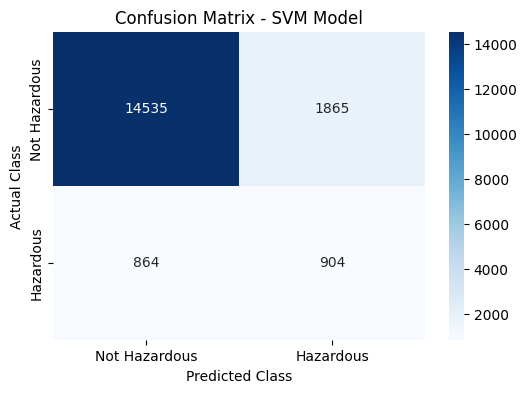


Classification Report:

               precision    recall  f1-score   support

Not Hazardous       0.94      0.89      0.91     16400
    Hazardous       0.33      0.51      0.40      1768

     accuracy                           0.85     18168
    macro avg       0.64      0.70      0.66     18168
 weighted avg       0.88      0.85      0.86     18168



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Hazardous", "Hazardous"],
            yticklabels=["Not Hazardous", "Hazardous"])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix - SVM Model")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred,
                            target_names=["Not Hazardous", "Hazardous"]))